# In this practice we will program a linear regression using for loops, functions and Lists

It is not a practice on regression. It is a practice on general python programming.

A linear regression is when you fit a line to a collection of data points. The line that is "closest" to all the datapoints 
is the best regression.


$y=m*x+b$
 
 formula for a line: $m$ is the slope, and $b$ is the intercept.

#### Create a function that takes m, b and x and return the y value for that x

In [6]:
def getY(m,b,x):
    return m*x+b
getY(3,2,4)

14

#### Now, let's calculate the error between a data point and a line for a given x value

We will create a function called $error$, which will take in $m$, $b$ and a datapoint $[x,y]$ and it will return the distance between the line and the point.

To find the distance:
1. Get the $x$-value from the point and store is in a variable called $x_{point}$
2. Get the $y$-value from the point and store it in a variable called $y_{real}$
3. Use the $y_{hat}$ function to get the y value that "x_point" would give on the line
4. Find the difference between the y value from $y_{hat}$  and $y_{real}$
5. Return the absolute value of the distance (absolute error)

In [9]:

def error(m, b, dp):
    xPoint, yReal = dp
    yHat = getY(m, b, xPoint)
    diff = abs(yHat-yReal)
    return diff
    

In [10]:

print(error(1, 0, (3, 3))) #answer should be 0

print(error(1, 0, (3, 4))) #answer should be 1

print(error(1, -1, (3, 3))) #answer should be 1

print(error(-1, 1, (3, 3))) #answer should be 5

0
1
1
5


#### Next, we need to calculate the error of several datapoints against a line defined by some values of $m$, and $b$

In this part you will be given a set of datapoints and values for $m$ and $b$ andyou should compute the total error.
The total error is the sum of the individual errors for each datapoint.

The datapoints will be given as an array of tuples: i.e [(1, 1), (3, 3), (5, 5), (-1, -1)]

In [11]:
#You function goes here
def all_error(m, b, dps):
    errors = 0
    for dp in dps:
        errors += error(m, b, dp)
    return errors

In [12]:

datapoints = [(1, 1), (3, 3), (5, 5), (-1, -1)]
print(all_error(1, 0, datapoints))
# Answer should be 0

datapoints = [(1, 1), (3, 3), (5, 5), (-1, -1)]
print(all_error(1, 1, datapoints))
# Answer should be 4

datapoints = [(1, 1), (3, 3), (5, 5), (-1, -1)]
print(all_error(1, -1, datapoints))
# Answer should be 4


datapoints = [(1, 1), (3, 3), (5, 5), (-1, -1)]
print(all_error(-1, 1, datapoints))
# Answer should be 18

0
4
4
18


# Now we will find the $m$ and $b$ values that minimize the error

Let's create a list of possible m values to try. Make the list possible_ms that goes from -10 to 10 inclusive, in increments of 0.1

In [36]:
import numpy as np
possible_ms = list(np.arange(-10,10.1,.1))

Make a list of possible_bs to check that would be the values from -20 to 20 inclusive, in steps of 0.1:

In [37]:
possible_bs = list(np.arange(-20,20.1,.1))

Now calculate the best m and b values for this dataset.

datapoints = [(1, 2), (2, 0), (3, 4), (4, 4), (5, 3)]

We are going to find the smallest error. First, we will make every possible `y = m*x + b` line by pairing all of the possible `m`s with all of the possible `b`s. Then, we will see which `y = m*x + b` line produces the smallest total error with the set of data stored in `datapoint`.

First, create the variables that we will be optimizing:
* `smallest_error` &mdash; this should start at infinity (`float("inf")`) so that any error we get at first will be smaller than our value of `smallest_error`
* `best_m` &mdash; we can start this at `0`
* `best_b` &mdash; we can start this at `0`

We want to:
* Iterate through each element `m` in `possible_ms`
* For every `m` value, take every `b` value in `possible_bs`
* If the value returned from `calculate_all_error` on this `m` value, this `b` value, and `datapoints` is less than our current `smallest_error`,
* Set `best_m` and `best_b` to be these values, and set `smallest_error` to this error.

By the end of these nested loops, the `smallest_error` should hold the smallest error we have found, and `best_m` and `best_b` should be the values that produced that smallest error value.

Print out `best_m`, `best_b` and `smallest_error` after the loops.



In [79]:
datapoints = [(1, 2), (2, 0), (3, 4), (4, 4), (5, 3)]
smallest_error = float("inf")
best_m = 0
best_b = 0

for m in possible_ms:
    for b in possible_bs:
        current_error = all_error(m, b, datapoints)
        if (current_error < smallest_error):
            best_m = m
            best_b = b
            smallest_error = current_error

In [80]:
m

9.999999999999929

In [81]:
b

20.00000000000057

In [82]:
current_error

237.00000000000176

In [83]:
smallest_error

5.0000000000002665

In [84]:
best_m

0.5999999999999623

In [85]:
best_b

1.4000000000003041

# Homework

# Do the following
1) Plot a scatter plot of the datapoints in the array (you should investigate what a scatter plot is).

2) In the same plot, draw five different lines in blue color for five randomly-chosen pairs of m,b in m_list and b_list respectively.

3) Again, in the same plot draw the line with the best_m and best_b values in red color

Note*: For this exercise you may use random library and matplotlib.pyplot library.

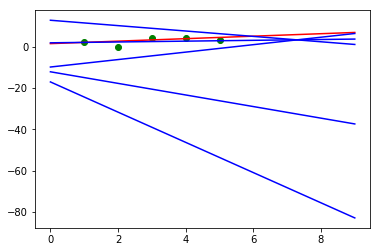

In [93]:
import matplotlib.pyplot as plt
import random as rnd

def linePlot(m, b):
    xD = []
    yD = []
    for x in range(0, 10):
        xD.append(x)
        yD.append(getY(m, b, x))
    return (xD, yD)
xDp = []
yDp = []
for dp in datapoints:
    xP, yP = dp
    xDp.append(xP)
    yDp.append(yP)
# Plot data points
plt.scatter(xDp, yDp, color='green')
# Draw line with best m and b
realX, realY = linePlot(best_m, best_b)
plt.plot(realX, realY, color='red')
# Draw five random lines
for i in range(0, 5):
    m = possible_ms[rnd.randint(0, len(possible_ms)-1)]
    b = possible_bs[rnd.randint(0, len(possible_bs)-1)]
    randX, randY = linePlot(m, b)
    plt.plot(randX, randY, color='blue')
plt.show()